In [1]:
import os
os.chdir("/home/ppavlik/repos/radar-dataset-preprocess")

from pathlib import Path
import pandas as pd
from utils import *
import pyart
from tqdm import tqdm

final_df = pd.DataFrame()

products = ["dBZ", "dBZv", "PhiDP", "KDP", "RhoHV", "W", "ZDR"]

folder = Path("/home/projects/p709-24-2/datasets/SHMU_Rainbow")
for product in products:
    result = list(folder.rglob(f"*0{product}.vol"))

    files_df = pd.DataFrame(result, columns=['full_path'])
    files_df['name'] = [x.name for x in result]
    files_df['time'] = [x.name[0:12] for x in result]
    files_df['time_parsed'] = pd.to_datetime(files_df['time'])
    files_df['product'] = product

    final_df = pd.concat([final_df, files_df])

In [2]:
out_folder = Path("/home/projects/p709-24-2/datasets/SHMU_4_New")
processed = list(out_folder.rglob(f"*.h5"))
processed = [item.name.split('.')[0] for item in processed]

In [3]:
final_df[~final_df['time'].isin(processed)]

,full_path,name,time,time_parsed,product
87796,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2021081622334800dBZ.vol,202108162233,2021-08-16 22:33:00,dBZ
87797,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2021081622384800dBZ.vol,202108162238,2021-08-16 22:38:00,dBZ
100510,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2022082216084900dBZ.vol,202208221608,2022-08-22 16:08:00,dBZ
100511,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2022082216134800dBZ.vol,202208221613,2022-08-22 16:13:00,dBZ
100512,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2022082216184800dBZ.vol,202208221618,2022-08-22 16:18:00,dBZ
100513,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2022082216234800dBZ.vol,202208221623,2022-08-22 16:23:00,dBZ
100514,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2022082216284800dBZ.vol,202208221628,2022-08-22 16:28:00,dBZ
100515,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2022082216334800dBZ.vol,202208221633,2022-08-22 16:33:00,dBZ
87795,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2021081622334800dBZv.vol,202108162233,2021-08-16 22:33:00,dBZv
87796,/home/projects/p709-24-2/datasets/SHMU_Rainbow...,2021081622384800dBZv.vol,202108162238,2021-08-16 22:38:00,dBZv


In [4]:
for time in final_df.time.unique()[0:1]:
    files_disc = {}
    temp_df = final_df[final_df.time == time]
    for product in products:
        files_disc[product] = temp_df[temp_df["product"] == product].full_path.apply(str).to_list()

In [5]:
metrics = pd.read_csv("/home/projects/p709-24-2/datasets/SHMU_4_volumetric/processed_reflectivity/metadata/metrics.csv")

In [6]:
import io
import sys
import gc
import logging
import argparse
import datetime as dt
import numpy as np
import h5py
import dask
import os
from dask.diagnostics import ProgressBar
from pathlib import Path
from threading import RLock
import wradlib.classify as classify
from wradlib.trafo import decibel
from wradlib.zr import r_to_z
from collections import defaultdict
from utils.wradlib_io import read_rainbow_wrl_custom
from utils.io import directory_is_empty, load_timestamps, rmtree, convert_float_to_uint, load_config, write_image
# simple text trap to get rid of pyart welcome messages
text_trap = io.StringIO()
sys.stdout = text_trap
import pyart
sys.stdout = sys.__stdout__


# rainbow field names for referencing
RAINBOW_FIELD_NAMES = {
    "W": "spectrum_width",
    "Wv": "spectrum_width_vv",  # non standard name
    "Wu": "unfiltered_spectrum_width",  # non standard name
    "Wvu": "unfiltered_spectrum_width_vv",  # non standard name
    "V": "velocity",
    "Vv": "velocity_vv",  # non standard name
    "Vu": "unfiltered_velocity",  # non standard name
    "Vvu": "unfiltered_velocity_vv",  # non standard name
    "dBZ": "reflectivity",
    "dBZv": "reflectivity_vv",  # non standard name
    "dBuZ": "unfiltered_reflectivity",  # non standard name
    "dBuZv": "unfiltered_reflectivity_vv",  # non standard name
    "ZDR": "differential_reflectivity",
    "ZDRu": "unfiltered_differential_reflectivity",  # non standard name
    "RhoHV": "cross_correlation_ratio",
    "RhoHVu": "unfiltered_cross_correlation_ratio",  # non standard name
    "PhiDP": "differential_phase",
    "uPhiDP": "uncorrected_differential_phase",  # non standard name
    "uPhiDPu": "uncorrected_unfiltered_differential_phase",  # non standard name
    "KDP": "specific_differential_phase",
    "uKDP": "uncorrected_specific_differential_phase",  # non standard name
    "uKDPu": "uncorrected_unfiltered_specific_differential_phase",  # non standard name
    "SQI": "signal_quality_index",  # non standard name
    "SQIv": "signal_quality_index_vv",  # non standard name
    "SQIu": "unfiltered_signal_quality_index",  # non standard name
    "SQIvu": "unfiltered_signal_quality_index_vv",  # non standard name
    "TEMP": "temperature",  # non standard name
    "ISO0": "iso0",  # non standard name
}

# typical maximum values for products as listed in Rainbow5 format manual        
RAINBOW_DATAMAXES = {
    "dBZ": 95.5,
    "dBZv": 95.5,
    "V": 30.0,
    "Vv": 30.0,
    "W": 15.0,
    "ZDR": 12.0,
    "RhoHV": 1.0,
    "PhiDP": 360.0,
    "KDP": 36.0,
}

# typical minimum values for products as listed in Rainbow5 format manual        
RAINBOW_DATAMINS = {
    "dBZ": -31.5,
    "dBZv": -31.5,
    "V": -30.0,
    "Vv": -30.0,
    "W": 0.0,
    "ZDR": -8.0,
    "RhoHV": 0.0,
    "PhiDP": 0.0,
    "KDP": -18.0,
}

# typical units for products as listed in Rainbow5 format manual 
RAINBOW_UNITS = {
    "dBZ": 'dB',
    "dBZv": 'dB',
    "V": 'm/s',
    "Vv": 'm/s',
    "W": 'm/s',
    "ZDR": 'dB',
    "RhoHV": '',
    "PhiDP": 'degree',
    "KDP": 'degree/km',
}
        

def convert_rnbw_to_h5(files, outfile, datetime):
    """
    Function for converting rainbow type files of multiple products to one h5 datasets.

    """
    try:
        for product in files.keys():
            radars = []
            # read selected radar images as Radar class to 1 tuple                    
            for file in files[product]:
                radars.append(read_rainbow_wrl_custom(file))
            radars = tuple(radars)
            
            # perform Cartesian mapping of Radar class, limit to the reflectivity field.
            grid = pyart.map.grid_from_radars(
                (radars),
                grid_shape=(16, 517, 755),
                grid_limits=((500.0,8000), (-517073/2, 517073/2), (-(789412+720621)/4, (789412+720621)/4)), # CAPPI 2km, limits based on size by SHMU - TODO - add this params to config
                grid_origin=((46.05+50.7)/2,(13.6+23.8)/2),
                fields=[RAINBOW_FIELD_NAMES[product]],
            )

            # to np.array from Grid object
            data = grid.fields[RAINBOW_FIELD_NAMES[product]]["data"].data
            data[grid.fields[RAINBOW_FIELD_NAMES[product]]["data"].mask] = np.nan
            del grid
            gc.collect()

            # save parameters for compression
            datamin = RAINBOW_DATAMINS[product]
            datamax = RAINBOW_DATAMAXES[product]
            datadepth = 8 #TODO customizable parameter
            
            # convert radar to uint
            data = convert_float_to_uint(
                data,
                datamin=datamin,
                datamax=datamax,
                depth=datadepth,
                target_type=np.uint8,
            )
            
            # create metadata attributes about file
            what_attrs = {
                "date": np.string_(datetime[:8]),
                "time": np.string_(datetime[8:]),
                "object": np.string_("RADARIMG"),
                "source": np.string_("SHMU"),
                "datamin": datamin,
                "datamax": datamax,
                "datadepth": datadepth,
                "productcode": np.string_(product),
                "product": np.string_(RAINBOW_FIELD_NAMES[product]),
                "units": np.string_(RAINBOW_UNITS[product]),
                "resolution": np.string_("1KM"),
                }
            
            
            with h5py.File(outfile, 'a') as f:
                # create groups and write image to h5 file
                group = f.require_group(product)
                ds_group = group.require_group('data')
                
                write_image(
                            group=ds_group,
                            ds_name='data',
                            data=data,
                            what_attrs=what_attrs,
                            )
    except:
        print("An exception occurred processing ", datetime)

In [102]:
convert_rnbw_to_h5(files_disc, 'test.h5', '201806121340')

In [13]:
files_disc['dBZ']

RAINBOW_FIELD_NAMES[product]

radars = []
# read selected radar images as Radar class to 1 tuple                    
for file in files_disc['dBZ']:
    radars.append(read_rainbow_wrl_custom(file))
radars = tuple(radars)

# perform Cartesian mapping of Radar class, limit to the reflectivity field.
grid = pyart.map.grid_from_radars(
    (radars),
    grid_shape=(16, 517, 755),
    grid_limits=((500.0,8000), (-517073/2, 517073/2), (-(789412+720621)/4, (789412+720621)/4)),
    grid_origin=((46.05+50.7)/2,(13.6+23.8)/2),
    fields=[RAINBOW_FIELD_NAMES['dBZ']],
)

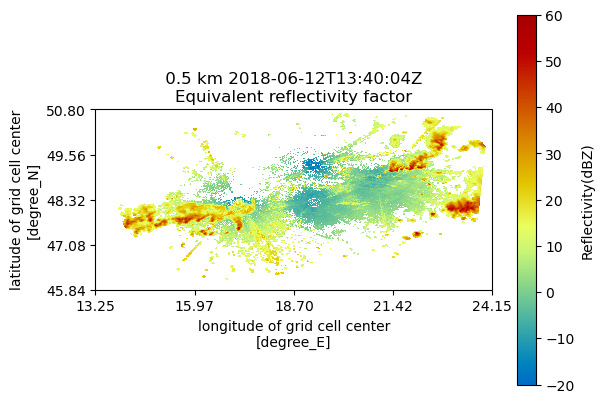

In [17]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid("reflectivity", level=0, vmin=-20, vmax=60, mask_outside=True)

In [27]:
grid.get_point_longitude_latitude()[1][-1,-1]

50.58016112002201

In [33]:
from pyproj import Proj

proj = Proj(proj='aeqd', lat_0=48.375, lon_0=18.7, x_0=0, y_0=0, units='m')

In [35]:
proj.to_proj4()

'+proj=aeqd +lat_0=48.375 +lon_0=18.7 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'

In [37]:
geodata = {
    "projection": grid.get_projparams(),
    "x": grid.x['data'],
    "y": grid.y['data'],
    "lat": grid.point_latitude['data'][0],
    "lon": grid.point_longitude['data'][0]
}

In [106]:
Path('/home/projects/p709-24-2/datasets/SHMU_4_New/' + time + '.h5')

PosixPath('/home/projects/p709-24-2/datasets/SHMU_4_New/201806121340.h5')